___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

In [51]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Import Libraries

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [53]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

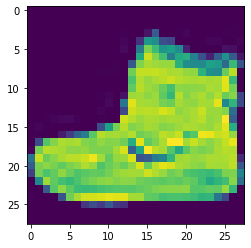

In [54]:
plt.imshow(x_train[0])

In [55]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [56]:
x_train[0].shape

(28, 28)

In [57]:
y_train[0]

9

In [59]:
classes[9]

'Ankle boot'

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [60]:
x_train.max()

255

In [61]:
x_train = x_train /255

In [62]:
x_test = x_test /255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [63]:
x_train.shape

(60000, 28, 28)

In [64]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [65]:
x_test = x_test.reshape(10000,28,28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [66]:
from tensorflow.keras.utils import to_categorical

In [67]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [68]:
y_cat_train = to_categorical(y_train)

In [69]:
y_cat_test = to_categorical(y_test)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [71]:
model = Sequential()
model.add(Conv2D(filters =28, kernel_size = (3,3), input_shape=(28,28,1),activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2),strides =(1,1)))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
                      optimizer = 'rmsprop',
                      metrics = 'accuracy')


In [72]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 4)

In [74]:
model.fit(x_train, y = y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 32, epochs = 10, verbose = 1, callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.4305 - accuracy: 0.8518 - val_loss: 0.3312 - val_accuracy: 0.8832
Epoch 2/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.3015 - accuracy: 0.8958 - val_loss: 0.2997 - val_accuracy: 0.8957
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2814 - accuracy: 0.9025 - val_loss: 0.2925 - val_accuracy: 0.8986
Epoch 4/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2740 - accuracy: 0.9061 - val_loss: 0.2954 - val_accuracy: 0.8988
Epoch 5/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.2707 - accuracy: 0.9073 - val_loss: 0.2962 - val_accuracy: 0.8983
Epoch 6/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2663 - accuracy: 0.9101 - val_loss: 0.2925 - val_accuracy: 0.8991
Epoch 7/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2657 - accuracy: 0.9099 - val_loss: 0.3064 -

**TASK 7: Plot values of metrics you used in your model.**

In [77]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.430475,0.851850,0.331228,0.8832
1,0.301539,0.895817,0.299707,0.8957
2,0.281411,0.902450,0.292507,0.8986
3,0.273955,0.906117,0.295384,0.8988
4,0.270669,0.907283,0.296234,0.8983


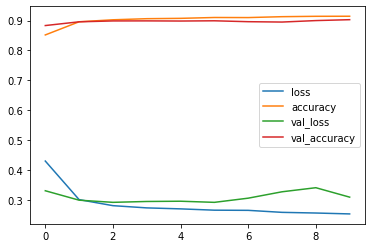

In [78]:
loss_df.plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [79]:
model.metrics_names

['loss', 'accuracy']

In [80]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3098 - accuracy: 0.9028


[0.30983296036720276, 0.9028000235557556]

In [81]:
from sklearn.metrics import classification_report

In [82]:
predictions = model.predict(x_test)
predictions

array([[1.33432978e-11, 1.43729389e-15, 2.57947014e-11, ...,
        5.85394155e-04, 1.02331605e-07, 9.99378085e-01],
       [8.97819859e-07, 1.49084985e-18, 9.99998689e-01, ...,
        1.69131535e-17, 6.08225137e-11, 4.03137619e-20],
       [4.50925253e-09, 1.00000000e+00, 3.68475910e-11, ...,
        4.99285953e-16, 3.20733891e-11, 8.23167381e-13],
       ...,
       [1.94980809e-10, 6.55883869e-30, 1.30068468e-13, ...,
        1.50651861e-15, 1.00000000e+00, 2.69740165e-18],
       [6.69200562e-09, 9.99999285e-01, 2.46147464e-10, ...,
        6.57426790e-14, 2.61777322e-10, 3.45098707e-11],
       [1.48828767e-04, 3.47088225e-08, 1.41726376e-03, ...,
        8.46869797e-02, 3.25126969e-03, 4.43829398e-04]], dtype=float32)

In [83]:
preds = np.argmax(predictions, axis=1)
preds

array([9, 2, 1, ..., 8, 1, 5])

In [84]:
y_cat_test.shape

(10000, 10)

In [85]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [86]:
np.argmax(predictions[0])

9

In [87]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [88]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.82      0.86      0.84      1000
           3       0.91      0.90      0.91      1000
           4       0.80      0.88      0.84      1000
           5       0.97      0.97      0.97      1000
           6       0.80      0.66      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [89]:
classes[3]

'Dress'

## Prediction

In [90]:
samples = [x_test[5], x_test[10], x_test[13], x_test[16]]

TypeError: ignored

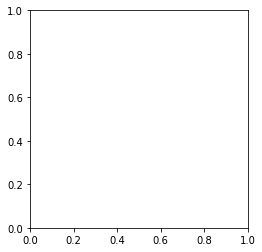

In [91]:
plt.imshow(samples[0])

In [93]:
samples[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.75294118],
        [0.7372549 ],
        [0.70980392],
        [0.74117647],
        [0.61568627],
        [0.64705882],
        [0.7372549 ],
        [0.69019608],
        [0.70196078],
        [0.70980392],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.05490196],
        [0.92156863],
        [0.83529412],
        [0.83529412],
        [0.8745098 ],
        [0.88235294],
        [0.85098039],
        [0.83921569],
        

In [94]:
img = samples[0]

In [95]:
img.shape

(28, 28, 1)

In [96]:
type(img)

numpy.ndarray

In [97]:
reseized_img = np.expand_dims(img, axis= 0)
reseized_img.shape

(1, 28, 28, 1)

In [98]:
model.predict(reseized_img)

array([[6.7385306e-09, 1.0000000e+00, 3.4638487e-11, 8.2487896e-13,
        2.1153536e-11, 2.3050332e-10, 1.1333963e-09, 6.0833774e-17,
        4.6205442e-10, 2.3458300e-13]], dtype=float32)

In [99]:
np.argmax(model.predict(reseized_img))

1

In [100]:
classes[0]

'T-shirt/top'

In [101]:
for img in samples:
    reseized_img=np.expand_dims(img, axis=0)
    print(pd.Series(model.predict(reseized_img).flatten(), index= classes).round(3))
    print(f"predicted class is : {classes[np.argmax(model.predict(reseized_img))]}\n")

T-shirt/top    0.0
Trouser        1.0
Pullover       0.0
Dress          0.0
Coat           0.0
Sandal         0.0
Shirt          0.0
Sneaker        0.0
Bag            0.0
Ankle boot     0.0
dtype: float32
predicted class is : Trouser

T-shirt/top    0.000
Trouser        0.000
Pullover       0.009
Dress          0.000
Coat           0.986
Sandal         0.000
Shirt          0.005
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted class is : Coat

T-shirt/top    0.0
Trouser        0.0
Pullover       0.0
Dress          1.0
Coat           0.0
Sandal         0.0
Shirt          0.0
Sneaker        0.0
Bag            0.0
Ankle boot     0.0
dtype: float32
predicted class is : Dress

T-shirt/top    0.007
Trouser        0.000
Pullover       0.864
Dress          0.000
Coat           0.000
Sandal         0.000
Shirt          0.128
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted class is : Pullover



# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___